<a href="https://colab.research.google.com/github/somiljain7/AI/blob/master/forecast1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn
!pip install fbprophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install search_sampler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.9 MB/s 
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 1.12.11
    Uninstalling google-api-python-client-1.12.11:
      Successfully uninstalled google-api-python-client-1.12.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
firebase-admin 4.4.0 requires google-api-python-client>=1.7.8, but you have google-api-python-client 1.6.5 which is incompatible.
earthengine-api 0.1.315 requires google-api-python-client<2,>=1.12.1, but you have google-api-python-client 1.6.5 which is incompatible.


In [ ]:
import os
import sys
import fbprophet
import datetime
import holidays
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as pyplot
from datetime import date
from statistics import mode
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from matplotlib import pyplot as plt
from statsmodels.tsa import seasonal
from statsmodels.tsa import stattools
from search_sampler import SearchSampler
from pandas.plotting import autocorrelation_plot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoLarsCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
btc=pd.read_csv('dogecoin.csv')

In [ ]:
btc

,date,Dogecoin,isPartial
0,2019-01-01 00:00:00,15,False
1,2019-01-01 01:00:00,64,False
2,2019-01-01 02:00:00,0,False
3,2019-01-01 03:00:00,35,False
4,2019-01-01 04:00:00,35,False
...,...,...,...
14699,2020-08-31 21:00:00,22,False
14700,2020-08-31 22:00:00,38,False
14701,2020-08-31 23:00:00,53,False
14702,2020-09-01 00:00:00,54,False


In [ ]:
btc['Dates'] = pd.to_datetime(btc['date']).dt.date

In [ ]:
btc

,date,Dogecoin,isPartial,Dates
0,2019-01-01 00:00:00,15,False,2019-01-01
1,2019-01-01 01:00:00,64,False,2019-01-01
2,2019-01-01 02:00:00,0,False,2019-01-01
3,2019-01-01 03:00:00,35,False,2019-01-01
4,2019-01-01 04:00:00,35,False,2019-01-01
...,...,...,...,...
14699,2020-08-31 21:00:00,22,False,2020-08-31
14700,2020-08-31 22:00:00,38,False,2020-08-31
14701,2020-08-31 23:00:00,53,False,2020-08-31
14702,2020-09-01 00:00:00,54,False,2020-09-01


In [ ]:
prophetdf=pd.DataFrame()
prophetdf['ds']=btc['date']
prophetdf['y']=btc['Dogecoin']

In [ ]:
prophetdf

,ds,y
0,2019-01-01 00:00:00,15
1,2019-01-01 01:00:00,64
2,2019-01-01 02:00:00,0
3,2019-01-01 03:00:00,35
4,2019-01-01 04:00:00,35
...,...,...
14699,2020-08-31 21:00:00,22
14700,2020-08-31 22:00:00,38
14701,2020-08-31 23:00:00,53
14702,2020-09-01 00:00:00,54


In [ ]:
m=Prophet()
m.fit(prophetdf)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future=m.make_future_dataframe(periods=365)
future.tail()

,ds
14977,2021-08-28
14978,2021-08-29
14979,2021-08-30
14980,2021-08-31
14981,2021-09-01


In [ ]:
forecast=m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01 00:00:00,28.330522,8.054059,59.090942,28.330522,28.330522,5.338531,5.338531,5.338531,4.912315,4.912315,4.912315,0.426215,0.426215,0.426215,0.0,0.0,0.0,33.669052
1,2019-01-01 01:00:00,28.330667,8.736937,60.204879,28.330667,28.330667,5.445061,5.445061,5.445061,4.976373,4.976373,4.976373,0.468688,0.468688,0.468688,0.0,0.0,0.0,33.775728
2,2019-01-01 02:00:00,28.330812,9.915726,57.132498,28.330812,28.330812,5.744744,5.744744,5.744744,5.239713,5.239713,5.239713,0.505032,0.505032,0.505032,0.0,0.0,0.0,34.075557
3,2019-01-01 03:00:00,28.330958,10.010611,57.499688,28.330958,28.330958,5.918448,5.918448,5.918448,5.383145,5.383145,5.383145,0.535303,0.535303,0.535303,0.0,0.0,0.0,34.249406
4,2019-01-01 04:00:00,28.331103,9.286322,56.513172,28.331103,28.331103,5.266533,5.266533,5.266533,4.706904,4.706904,4.706904,0.559629,0.559629,0.559629,0.0,0.0,0.0,33.597636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14977,2021-08-28 00:00:00,36.352300,16.447325,66.406259,32.739542,40.201579,5.254186,5.254186,5.254186,4.912315,4.912315,4.912315,0.341870,0.341870,0.341870,0.0,0.0,0.0,41.606485
14978,2021-08-29 00:00:00,36.370816,15.778737,64.768038,32.749000,40.237964,4.670224,4.670224,4.670224,4.912315,4.912315,4.912315,-0.242091,-0.242091,-0.242091,0.0,0.0,0.0,41.041040
14979,2021-08-30 00:00:00,36.389332,15.047116,64.148206,32.757280,40.268380,3.489922,3.489922,3.489922,4.912315,4.912315,4.912315,-1.422393,-1.422393,-1.422393,0.0,0.0,0.0,39.879254
14980,2021-08-31 00:00:00,36.407848,19.631078,66.873607,32.765559,40.285110,5.338531,5.338531,5.338531,4.912315,4.912315,4.912315,0.426215,0.426215,0.426215,0.0,0.0,0.0,41.746379


In [ ]:
erroranalytics = m.predict(prophetdf)
erroranalytics['Dogecoin'] = prophetdf['y'] # import real value
erroranalytics['residuals'] = erroranalytics['Dogecoin'] - erroranalytics['yhat'] # compare predict value to real value
erroranalytics['absoluteresiduals'] = abs(erroranalytics['residuals']) # absolute error
# Have a glance
erroranalytics.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,Dogecoin,residuals,absoluteresiduals
0,2019-01-01 00:00:00,28.330522,9.309405,57.506580,28.330522,28.330522,5.338531,5.338531,5.338531,4.912315,...,0.426215,0.426215,0.426215,0.0,0.0,0.0,33.669052,15,-18.669052,18.669052
1,2019-01-01 01:00:00,28.330667,9.323076,58.867944,28.330667,28.330667,5.445061,5.445061,5.445061,4.976373,...,0.468688,0.468688,0.468688,0.0,0.0,0.0,33.775728,64,30.224272,30.224272
2,2019-01-01 02:00:00,28.330812,9.112729,57.030563,28.330812,28.330812,5.744744,5.744744,5.744744,5.239713,...,0.505032,0.505032,0.505032,0.0,0.0,0.0,34.075557,0,-34.075557,34.075557
3,2019-01-01 03:00:00,28.330958,9.336632,60.286115,28.330958,28.330958,5.918448,5.918448,5.918448,5.383145,...,0.535303,0.535303,0.535303,0.0,0.0,0.0,34.249406,35,0.750594,0.750594
4,2019-01-01 04:00:00,28.331103,9.663043,58.295674,28.331103,28.331103,5.266533,5.266533,5.266533,4.706904,...,0.559629,0.559629,0.559629,0.0,0.0,0.0,33.597636,35,1.402364,1.402364


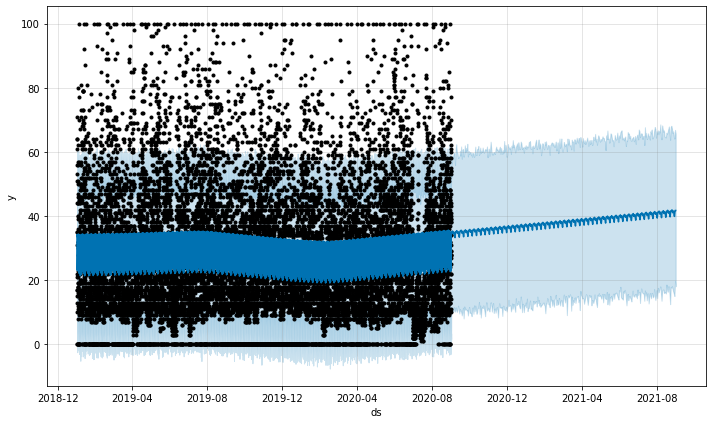

In [ ]:
fig1=m.plot(forecast)

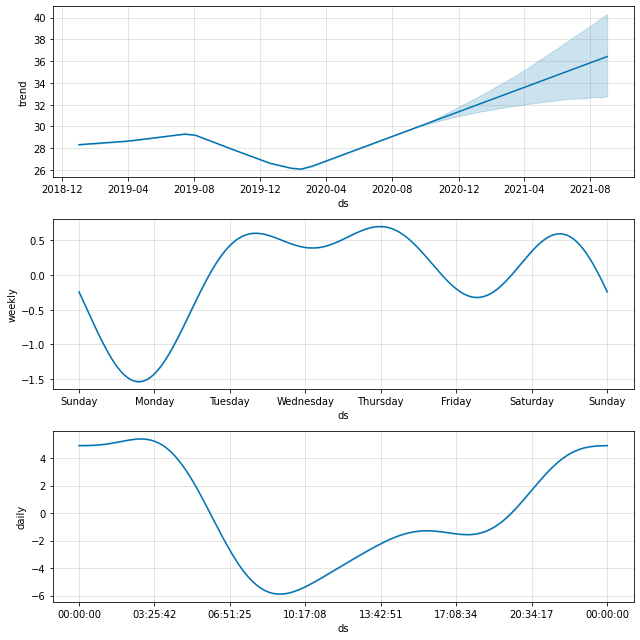

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
totalerror = erroranalytics['absoluteresiduals'].sum()

In [ ]:
print(totalerror)
print(totalerror/len(erroranalytics))

219725.30037249406
14.943233159173971


In [ ]:
erroranalytics['Dogecoin'].describe()
#erroranalytics

count    14704.000000
mean        28.076034
std         19.593584
min          0.000000
25%         14.000000
50%         25.000000
75%         39.000000
max        100.000000
Name: Dogecoin, dtype: float64

# ***HOLIDAYS BASED FORECAST***

In [ ]:
goodholidays = [] # new list for holidays
for i in [2019,2020,2021,2022]:
  for date, name in sorted(holidays.US(years=i).items()): # take an example of 2014
      goodholidays.append(name)
      print(date, name)

2019-01-01 New Year's Day
2019-01-21 Martin Luther King Jr. Day
2019-02-18 Washington's Birthday
2019-05-27 Memorial Day
2019-07-04 Independence Day
2019-09-02 Labor Day
2019-10-14 Columbus Day
2019-11-11 Veterans Day
2019-11-28 Thanksgiving
2019-12-25 Christmas Day
2020-01-01 New Year's Day
2020-01-20 Martin Luther King Jr. Day
2020-02-17 Washington's Birthday
2020-05-25 Memorial Day
2020-07-03 Independence Day (Observed)
2020-07-04 Independence Day
2020-09-07 Labor Day
2020-10-12 Columbus Day
2020-11-11 Veterans Day
2020-11-26 Thanksgiving
2020-12-25 Christmas Day
2021-01-01 New Year's Day
2021-01-18 Martin Luther King Jr. Day
2021-02-15 Washington's Birthday
2021-05-31 Memorial Day
2021-07-04 Independence Day
2021-07-05 Independence Day (Observed)
2021-09-06 Labor Day
2021-10-11 Columbus Day
2021-11-11 Veterans Day
2021-11-25 Thanksgiving
2021-12-24 Christmas Day (Observed)
2021-12-25 Christmas Day
2021-12-31 New Year's Day (Observed)
2021-12-31 New Year's Day (Observed)
2022-01-01 